# Egor Bezriadin

## Research questions

Recent Grads dataset, which our project team found on [kaggle.com](kaggle.com), contains a vast amount of information about majors of students graduated from colleges across all of the United States during the unknow period of time (approximately 2008 - 2012). It includes fields like major itself, its category, students' sex info, post-graduation employment type and earning percentiles. There are a lots of possible things to explore, but personally I am interested in things like major categories popularity amongst students, and what are the chances of finding a job in a specific field after graduation.

1. In which spheres students are able to find jobs that are worthy of their education?
2. Which major category is the most program-diverse?

In [32]:
import pandas as pd
data = pd.read_csv('../data/raw/recent-grads.csv')

# First look at the dataset
The first and the last 5 rows of the dataset: 

In [36]:
data.head()

Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  ...  \
0   2057.0    282.0    Engineering    0.120564           36      1976  ...   
1    679.0     77.0    Engineering    0.101852            7       640  ...   
2    725.0    131.0    Engineering    0.153037            3       648  ...   
3   1123.0    135.0    Engineering    0.107313           16       758  ...   
4  21239.0  11021.0    Engineering    0.341631          289     25694  ...   

   Part_time  Full_time_year_round  Unemployed  Unemployment_rate  Median  \
0        270                  1207          37           0.018381  110000   
1        170                   388          85           0.117241   75000   
2        133                   340          16           0.024096   73000   
3        150                   692          40           0.050125   70000   
4       5180                 16697        1672           0.061098   65000   

   P25th   P75th  College_jobs  Non_college_jobs  Low_wage_jobs  
0  95000  125000          1534               364            193  
1  55000   90000           350               257             50  
2  50000  105000           456               176              0  
3  43000   80000           529               102              0  
4  50000   75000         18314              4440            972  

[5 rows x 21 columns]

In [37]:
data.tail()

Rank  Major_code                   Major   Total     Men   Women  \
168   169        3609                 ZOOLOGY  8409.0  3050.0  5359.0   
169   170        5201  EDUCATIONAL PSYCHOLOGY  2854.0   522.0  2332.0   
170   171        5202     CLINICAL PSYCHOLOGY  2838.0   568.0  2270.0   
171   172        5203   COUNSELING PSYCHOLOGY  4626.0   931.0  3695.0   
172   173        3501         LIBRARY SCIENCE  1098.0   134.0   964.0   

               Major_category  ShareWomen  Sample_size  Employed  ...  \
168    Biology & Life Science    0.637293           47      6259  ...   
169  Psychology & Social Work    0.817099            7      2125  ...   
170  Psychology & Social Work    0.799859           13      2101  ...   
171  Psychology & Social Work    0.798746           21      3777  ...   
172                 Education    0.877960            2       742  ...   

     Part_time  Full_time_year_round  Unemployed  Unemployment_rate  Median  \
168       2190                  3602         304           0.046320   26000   
169        572                  1211         148           0.065112   25000   
170        648                  1293         368           0.149048   25000   
171        965                  2738         214           0.053621   23400   
172        237                   410          87           0.104946   22000   

     P25th  P75th  College_jobs  Non_college_jobs  Low_wage_jobs  
168  20000  39000          2771              2947            743  
169  24000  34000          1488               615             82  
170  25000  40000           986               870            622  
171  19200  26000          2403              1245            308  
172  20000  22000           288               338            192  

[5 rows x 21 columns]

# Milestone 3

##  Task 1
##  Data Cleaning and Processing:

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("Number of rows and columns in the dataset:", data.shape, "\n")
print("Names of columns in the dataset:\n", data.columns)

Number of rows and columns in the dataset: (173, 21) 

Names of columns in the dataset:
 Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')


In [44]:
print("Table of unique values in the dataset:\n", data.nunique())

Table of unique values in the dataset:
 Rank                    173
Major_code              173
Major                   173
Total                   172
Men                     172
Women                   171
Major_category           16
ShareWomen              172
Sample_size             147
Employed                171
Full_time               173
Part_time               170
Full_time_year_round    173
Unemployed              161
Unemployment_rate       169
Median                   59
P25th                    48
P75th                    54
College_jobs            173
Non_college_jobs        173
Low_wage_jobs           166
dtype: int64


In [47]:
print("List of major categories:", data['Major_category'].unique(), "\n")
print("\nChecking if there's any null values:\n", data.isnull().sum())

List of major categories: ['Engineering' 'Business' 'Physical Sciences' 'Law & Public Policy'
 'Computers & Mathematics' 'Agriculture & Natural Resources'
 'Industrial Arts & Consumer Services' 'Arts' 'Health' 'Social Science'
 'Biology & Life Science' 'Education' 'Humanities & Liberal Arts'
 'Psychology & Social Work' 'Communications & Journalism'
 'Interdisciplinary'] 


Checking if there's any null values:
 Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64


In [9]:
data.describe(include='object').T

count unique                    top freq
Major            173    173  PETROLEUM ENGINEERING    1
Major_category   173     16            Engineering   29

In [10]:
data.describe(include='float64').T

count          mean           std    min          25%  \
Total              172.0  39370.081395  63483.491009  124.0  4549.750000   
Men                172.0  16723.406977  28122.433474  119.0  2177.500000   
Women              172.0  22646.674419  41057.330740    0.0  1778.250000   
ShareWomen         172.0      0.522223      0.231205    0.0     0.336026   
Unemployment_rate  173.0      0.068191      0.030331    0.0     0.050306   

                            50%           75%            max  
Total              15104.000000  38909.750000  393735.000000  
Men                 5434.000000  14631.000000  173809.000000  
Women               8386.500000  22553.750000  307087.000000  
ShareWomen             0.534024      0.703299       0.968954  
Unemployment_rate      0.067961      0.087557       0.177226

Distribution Plots for percentile earnings, number of programs in each major category and number of college jobs landed after graduation:

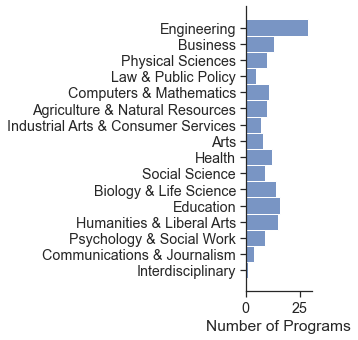

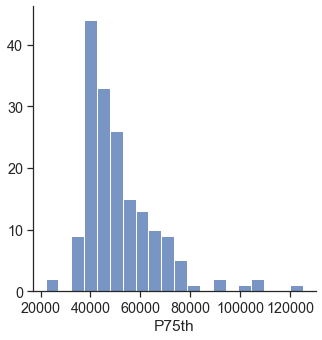

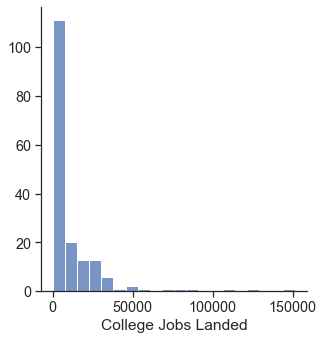

In [11]:
sns.set_theme(style="ticks", font_scale=1.3)
sns.displot(data, y=data['Major_category']).set_axis_labels("Number of Programs", "")
sns.displot(data['P75th'], bins=20).set_axis_labels("P75th", "")
sns.displot(data['College_jobs'], bins=20).set_axis_labels("College Jobs Landed", "")

## Task 2-3

# Load the unprocessed file:

In [12]:
import project_functions1 as p1

In [13]:
pathRaw = '../data/raw/recent-grads.csv'
rawData = p1.load_raw(pathRaw)
rawData

Rank  Major_code                                      Major    Total  \
0       1        2419                      PETROLEUM ENGINEERING   2339.0   
1       2        2416             MINING AND MINERAL ENGINEERING    756.0   
2       3        2415                  METALLURGICAL ENGINEERING    856.0   
3       4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4       5        2405                       CHEMICAL ENGINEERING  32260.0   
..    ...         ...                                        ...      ...   
168   169        3609                                    ZOOLOGY   8409.0   
169   170        5201                     EDUCATIONAL PSYCHOLOGY   2854.0   
170   171        5202                        CLINICAL PSYCHOLOGY   2838.0   
171   172        5203                      COUNSELING PSYCHOLOGY   4626.0   
172   173        3501                            LIBRARY SCIENCE   1098.0   

         Men    Women            Major_category  ShareWomen  Sample_size  \
0     2057.0    282.0               Engineering    0.120564           36   
1      679.0     77.0               Engineering    0.101852            7   
2      725.0    131.0               Engineering    0.153037            3   
3     1123.0    135.0               Engineering    0.107313           16   
4    21239.0  11021.0               Engineering    0.341631          289   
..       ...      ...                       ...         ...          ...   
168   3050.0   5359.0    Biology & Life Science    0.637293           47   
169    522.0   2332.0  Psychology & Social Work    0.817099            7   
170    568.0   2270.0  Psychology & Social Work    0.799859           13   
171    931.0   3695.0  Psychology & Social Work    0.798746           21   
172    134.0    964.0                 Education    0.877960            2   

     Employed  ...  Part_time  Full_time_year_round  Unemployed  \
0        1976  ...        270                  1207          37   
1         640  ...        170                   388          85   
2         648  ...        133                   340          16   
3         758  ...        150                   692          40   
4       25694  ...       5180                 16697        1672   
..        ...  ...        ...                   ...         ...   
168      6259  ...       2190                  3602         304   
169      2125  ...        572                  1211         148   
170      2101  ...        648                  1293         368   
171      3777  ...        965                  2738         214   
172       742  ...        237                   410          87   

     Unemployment_rate  Median  P25th   P75th  College_jobs  Non_college_jobs  \
0             0.018381  110000  95000  125000          1534               364   
1             0.117241   75000  55000   90000           350               257   
2             0.024096   73000  50000  105000           456               176   
3             0.050125   70000  43000   80000           529               102   
4             0.061098   65000  50000   75000         18314              4440   
..                 ...     ...    ...     ...           ...               ...   
168           0.046320   26000  20000   39000          2771              2947   
169           0.065112   25000  24000   34000          1488               615   
170           0.149048   25000  25000   40000           986               870   
171           0.053621   23400  19200   26000          2403              1245   
172           0.104946   22000  20000   22000           288               338   

     Low_wage_jobs  
0              193  
1               50  
2                0  
3                0  
4              972  
..             ...  
168            743  
169             82  
170            622  
171            308  
172            192  

[173 rows x 21 columns]

# Processing data
Here, we drop the columns we do not need and any rows with null values

In [57]:
cdf = p1.process_data(pathRaw) #cdf = clean dataframe

In [58]:
cdf.describe(include='float64').T

count          mean           std    min          25%  \
Total              172.0  39370.081395  63483.491009  124.0  4549.750000   
Men                172.0  16723.406977  28122.433474  119.0  2177.500000   
Women              172.0  22646.674419  41057.330740    0.0  1778.250000   
Unemployment_rate  172.0      0.068024      0.030340    0.0     0.050261   

                            50%           75%            max  
Total              15104.000000  38909.750000  393735.000000  
Men                 5434.000000  14631.000000  173809.000000  
Women               8386.500000  22553.750000  307087.000000  
Unemployment_rate      0.067544      0.087247       0.177226

In [59]:
cdf.describe(include='int64').T

count          mean           std      min       25%  \
Employed          172.0  31355.808140  50777.428650      0.0   3734.75   
Unemployed        172.0   2428.412791   4121.730452      0.0    299.50   
Median            172.0  40076.744186  11461.388773  22000.0  33000.00   
P25th             172.0  29486.918605   9190.769927  18500.0  24000.00   
P75th             172.0  51386.627907  14882.278650  22000.0  41750.00   
College_jobs      172.0  12387.401163  21344.967522      0.0   1744.75   
Non_college_jobs  172.0  13354.325581  23841.326605      0.0   1594.00   
Low_wage_jobs     172.0   3878.633721   6960.467621      0.0    336.75   

                      50%       75%       max  
Employed          12031.5  31701.25  307933.0  
Unemployed          905.0   2397.00   28169.0  
Median            36000.0  45000.00  110000.0  
P25th             27000.0  33250.00   95000.0  
P75th             47000.0  58500.00  125000.0  
College_jobs       4467.5  14595.75  151643.0  
Non_college_jobs   4603.5  11791.75  148395.0  
Low_wage_jobs      1238.5   3496.00   48207.0

After that, we group the dataset by major categories (because it is much more difficult to deal with separate majors), fix unemployment rate (which is higher that 1 in some of the rows) and add new column "Number of Programs" in each major category

Also, we will keep the initial form of the dataset (nmdf) for greater convenience when buliding seaborn plots

In [60]:
nmdf = p1.fix_unempoyment(cdf)

cdf = p1.group_by_majorCat(cdf)
cdf = p1.fix_unempoyment(cdf)
cdf

Major_category      Total       Men     Women  \
0       Agriculture & Natural Resources    75620.0   40357.0   35263.0   
1                                  Arts   357130.0  134390.0  222740.0   
2                Biology & Life Science   453862.0  184919.0  268943.0   
3                              Business  1302376.0  667852.0  634524.0   
4           Communications & Journalism   392601.0  131921.0  260680.0   
5               Computers & Mathematics   299008.0  208725.0   90283.0   
6                             Education   559129.0  103526.0  455603.0   
7                           Engineering   537583.0  408307.0  129276.0   
8                                Health   463230.0   75517.0  387713.0   
9             Humanities & Liberal Arts   713468.0  272846.0  440622.0   
10  Industrial Arts & Consumer Services   229792.0  103781.0  126011.0   
11                    Interdisciplinary    12296.0    2817.0    9479.0   
12                  Law & Public Policy   179107.0   91129.0   87978.0   
13                    Physical Sciences   185479.0   95390.0   90089.0   
14             Psychology & Social Work   481007.0   98115.0  382892.0   
15                       Social Science   529966.0  256834.0  273132.0   

    Employed  Unemployed   Median    P25th    P75th  College_jobs  \
0      63794        3486   316000   222000   410100         18677   
1     288114       28228   264500   175700   349300         94785   
2     302797       22854   509900   372600   645200        151233   
3    1088742       79877   566000   435000   713000        148538   
4     330660       26852   138000   105000   179900         86556   
5     237894       18373   470200   322200   639000        137859   
6     479839       24969   517600   425450   617000        338713   
7     420372       29817  1664100  1205100  2043000        269767   
8     372147       22213   441900   314000   603000        245441   
9     544118       51101   478700   352400   631100        192650   
10    189043       11526   254400   187400   316000         57200   
11      9821         749    35000    25000    44000          5176   
12    144790       13495   211000   163200   275000         29221   
13    139231        7880   418900   283500   572900         76552   
14    380344       33292   270900   228000   349000        164305   
15    401493       42975   336100   255200   451000        113960   

    Non_college_jobs  Low_wage_jobs  Correct_Unemployment_Rate  \
0              33217           7414                   0.046099   
1             163720          60116                   0.079041   
2             127182          42742                   0.050355   
3             496570         126788                   0.061332   
4             172992          49595                   0.068395   
5              74463          16136                   0.061447   
6             121761          40870                   0.044657   
7             102383          25079                   0.055465   
8             110496          31270                   0.047952   
9             276532          94240                   0.071623   
10            104620          26590                   0.050158   
11              3903           1061                   0.060914   
12            100024          20720                   0.075346   
13             49469          14078                   0.042485   
14            169366          56246                   0.069213   
15            190246          54180                   0.081090   

    Amount_of_Programs  
0                    9  
1                    8  
2                   14  
3                   13  
4                    4  
5                   11  
6                   16  
7                   29  
8                   12  
9                   15  
10                   7  
11                   1  
12                   5  
13                  10  
14                   9  
15                   9

## Task 4

# Data Analysis:

In [52]:
print("Number of rows and columns respectively:", cdf.shape, "\n")
print("Columns in the dataset:\n", cdf.columns)

Number of rows and columns respectively: (16, 14) 

Columns in the dataset:
 Index(['Major_category', 'Total', 'Men', 'Women', 'Employed', 'Unemployed',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs', 'Amount_of_Programs', 'Correct_Unemployment_Rate'],
      dtype='object')


In [53]:
cdf.describe(include='float64').T

count           mean            std           min  \
Total                       16.0  423228.375000  302206.084202  12296.000000   
Men                         16.0  179776.625000  164340.751375   2817.000000   
Women                       16.0  243451.750000  178026.269209   9479.000000   
Correct_Unemployment_Rate   16.0       0.060348       0.012720      0.042485   

                                     25%            50%            75%  \
Total                      218713.750000  423231.500000  531870.250000   
Men                         94324.750000  117851.000000  220752.250000   
Women                       90234.500000  241710.000000  384097.250000   
Correct_Unemployment_Rate       0.049607       0.061123       0.069816   

                                    max  
Total                      1.302376e+06  
Men                        6.678520e+05  
Women                      6.345240e+05  
Correct_Unemployment_Rate  8.109011e-02

In [63]:
nmdf.describe(include='object').T

count unique                    top freq
Major            172    172  PETROLEUM ENGINEERING    1
Major_category   172     16            Engineering   29

In [64]:
nmdf.describe(include='float64').T

count          mean           std    min  \
Total                      172.0  39370.081395  63483.491009  124.0   
Men                        172.0  16723.406977  28122.433474  119.0   
Women                      172.0  22646.674419  41057.330740    0.0   
Correct_Unemployment_Rate  172.0      0.058028      0.026841    0.0   

                                   25%           50%           75%  \
Total                      4549.750000  15104.000000  38909.750000   
Men                        2177.500000   5434.000000  14631.000000   
Women                      1778.250000   8386.500000  22553.750000   
Correct_Unemployment_Rate     0.042465      0.055941      0.073706   

                                     max  
Total                      393735.000000  
Men                        173809.000000  
Women                      307087.000000  
Correct_Unemployment_Rate       0.155461

### Analysis

* Overall, there are 16 unique Major Categories
* The most diverse major category is Engineering, offering 29 different programs
* Average unemployment rate across all of the majors is about 6%, which is an average in the US even today

In [68]:
import pandas_profiling
pandas_profiling.ProfileReport(nmdf)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Unfortunately, Pandas Profiling did not provide any new useful data, which could help us answer research questions

## Making seaborn Plots

Text(0, 0.5, ' ')

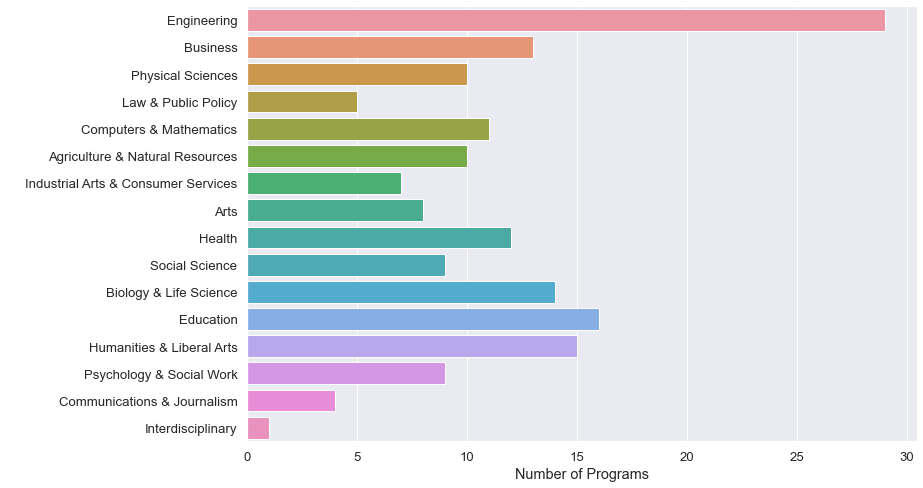

In [18]:
sns.set(rc = {'figure.figsize': (12,8)})
sns.set(font_scale=1.2)
ax = sns.countplot(y='Major_category', data=rawData)
ax.set_xlabel("Number of Programs")
ax.set_ylabel(" ")

### Graph Evaluation

* The graph demonstrates numbers of programs offered in each Major Category. Engineering has the highest amount of 29, which makes it the most diverse. It is followed by Education (16) and Humanities & Liberal Arts on the 2nd and 3rd places respectively. meanwhile, Communication & Journalism and Interdisciplinary categories are the least diverse, thus, ex students were to choose only between 4 and 1 programs in each category.

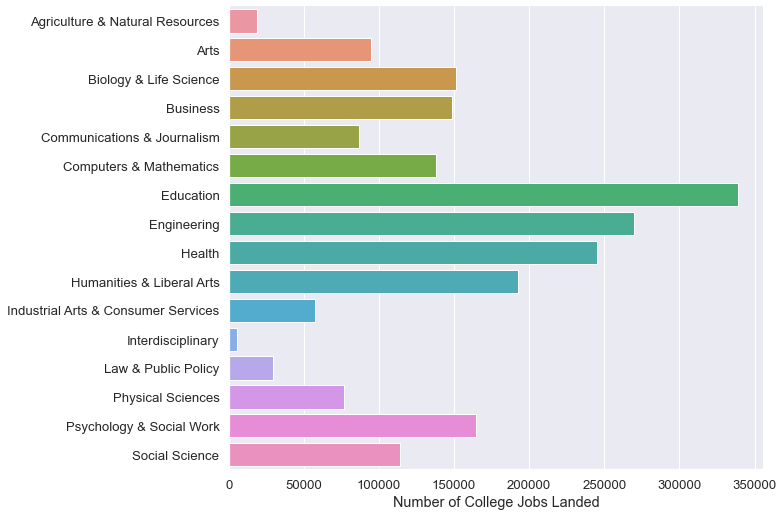

In [19]:
ax = sns.catplot(x="College_jobs", y="Major_category", data = cdf, kind="bar")
ax.fig.set_size_inches(30, 8)
ax.set_axis_labels("Number of College Jobs Landed", "")
plt.show()

### Graph Evaluation

* The graph demonstrates amount of graduates employed full time after finishing their studies. The top 4 here is pretty obvious, and these are Education, Engineering, Health and Humanities & Liberal Arts. The top 4 from the end are Interdisciplinary (which does not mean graduates in that field are unsuccessful, the category itself is pretty small), Agriculture & Natural Resources, Law & Public Policy and Industrial Arts & Consumer Services.

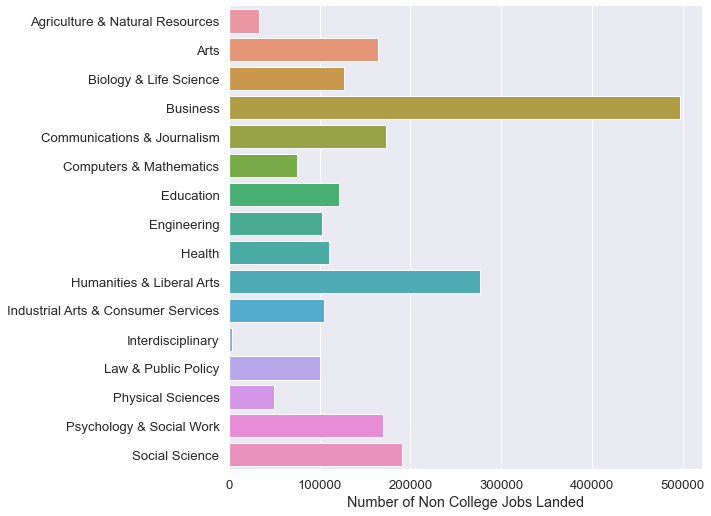

In [30]:
ax = sns.catplot(x="Non_college_jobs", y="Major_category", data = cdf, kind="bar")
ax.fig.set_size_inches(30, 8)
ax.set_axis_labels("Number of Non College Jobs Landed", "")
plt.show()

### Graph Evaluation

* As for the numbers of Non College Jobs landed by the ex students, the situation is completely different. Here, Business Majors seem to be the unluckiest in terms of finding a job, worthy of their education. Surprisingly, they are followed by Humanities & Liberal Arts, and in fact, their numbers are even higher than of college level jobs. The rest of the categories appear to be quite low.

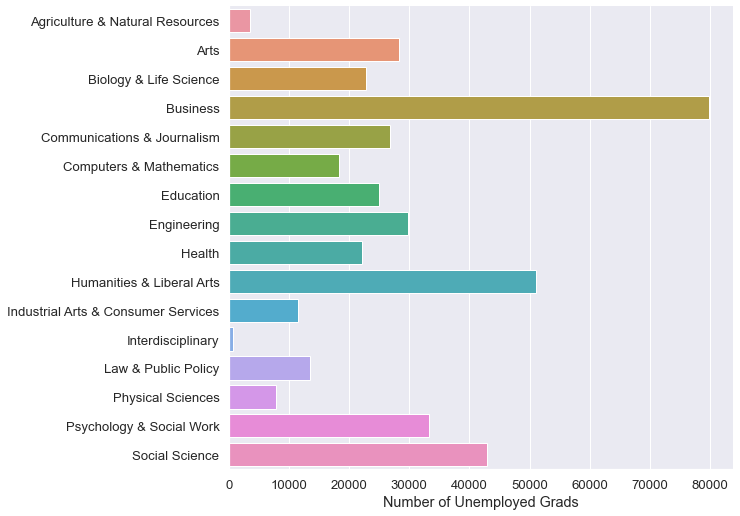

In [21]:
ax = sns.catplot(x="Unemployed", y="Major_category", data = cdf, kind="bar")
ax.fig.set_size_inches(30, 8)
ax.set_axis_labels("Number of Unemployed Grads", "")
plt.show()

### Graph Evaluation

* The trend in the Number of Unemployed Graduates stays the same as in the Non College Jobs, with a difference only in decreased numbers. Amount of Business grads, who were not able to find a job at all roughly reaches 80 thousands, and again, it is the highest mark. In the very same way, Humanities & Liberal Arts are on the 2nd place. Though, this time Social Science is unfortunate to get to the 3rd place.

By the sole comparison of numbers, it might be obvious that Business majors have some difficulties finding a decent job, meanwhile Education, Engineering and Health are the most successful and relevant ones. At the same time, Humanities & Liberal Arts somehow manage to end up in the both charts.

## Turning to percents

But let's convert this data into percentages and see if the distribution significantly changes:

In [74]:
cdf['College_job_%'] = (cdf['College_jobs'] / cdf ['Total']) * 100
cdf['NonCollege_job_%'] = (cdf['Non_college_jobs'] / cdf['Total']) * 100

Major_category      Total       Men     Women  Employed  \
0  Agriculture & Natural Resources    75620.0   40357.0   35263.0     63794   
1                             Arts   357130.0  134390.0  222740.0    288114   
2           Biology & Life Science   453862.0  184919.0  268943.0    302797   
3                         Business  1302376.0  667852.0  634524.0   1088742   
4      Communications & Journalism   392601.0  131921.0  260680.0    330660   

   Unemployed  Median   P25th   P75th  College_jobs  Non_college_jobs  \
0        3486  316000  222000  410100         18677             33217   
1       28228  264500  175700  349300         94785            163720   
2       22854  509900  372600  645200        151233            127182   
3       79877  566000  435000  713000        148538            496570   
4       26852  138000  105000  179900         86556            172992   

   Low_wage_jobs  Correct_Unemployment_Rate  Amount_of_Programs  \
0           7414                   0.046099                   9   
1          60116                   0.079041                   8   
2          42742                   0.050355                  14   
3         126788                   0.061332                  13   
4          49595                   0.068395                   4   

   College_job_%  NonCollege_job_%  
0      24.698492         43.926210  
1      26.540755         45.843250  
2      33.321362         28.022174  
3      11.405155         38.128006  
4      22.046811         44.063056

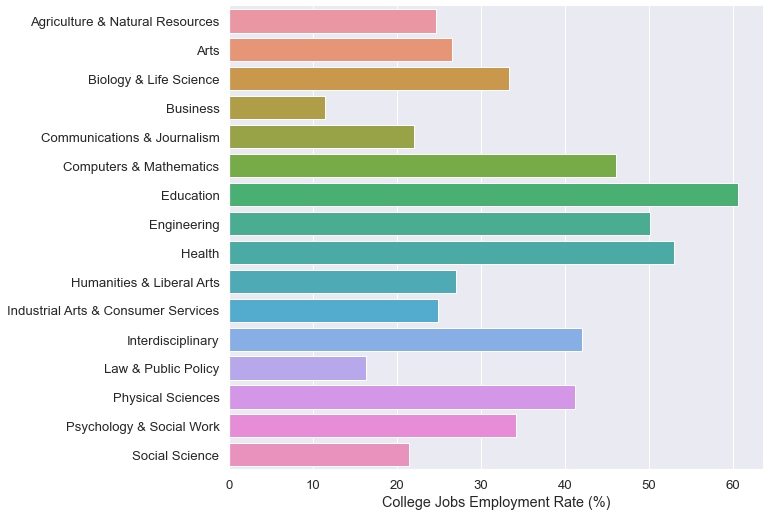

In [110]:
ax = sns.catplot(x="College_job_%", y="Major_category", data = cdf, kind="bar")
ax.fig.set_size_inches(30, 8)
ax.set_axis_labels("College Jobs Employment Rate (%)", "")

Now, Top 4 Most Favourable Majors by employers are Education, Health, Engineering, and now Computers & Mathematics, in range from 61 to 46 percents. Interdisciplinary recovers from the very bottom with a decent 42% result, while Business dips down and becomes the lowest, scoring only about 12%.

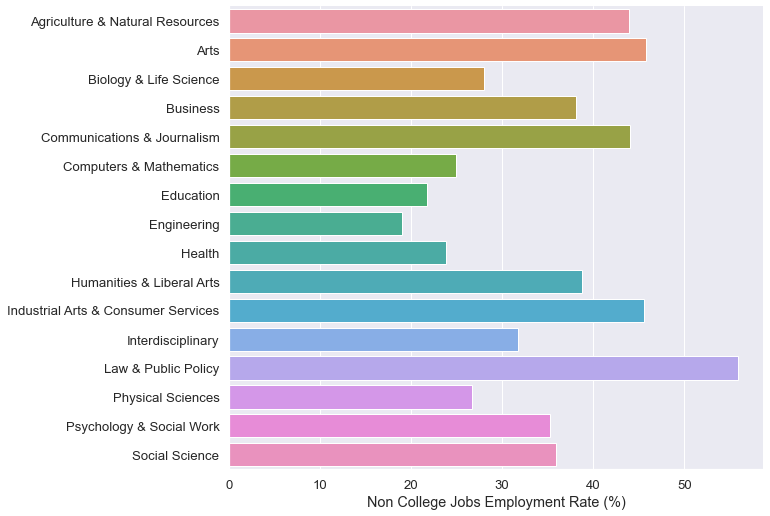

In [111]:
ax = sns.catplot(x="NonCollege_job_%", y="Major_category", data = cdf, kind="bar")
ax.fig.set_size_inches(30, 8)
ax.set_axis_labels("Non College Jobs Employment Rate (%)", "")

Amongst Non College Jobs, Law & Public Policy students have the highest number (56%) of not finding a job, matching their field of studies. The rest highest categories are stuck around 45%, including Industrial Arts & Consumer Services, Arts, Communications & Journalism and Agriculture & Natural Resources. Engineering scores the lowest non college jobs percentage of about 19%.

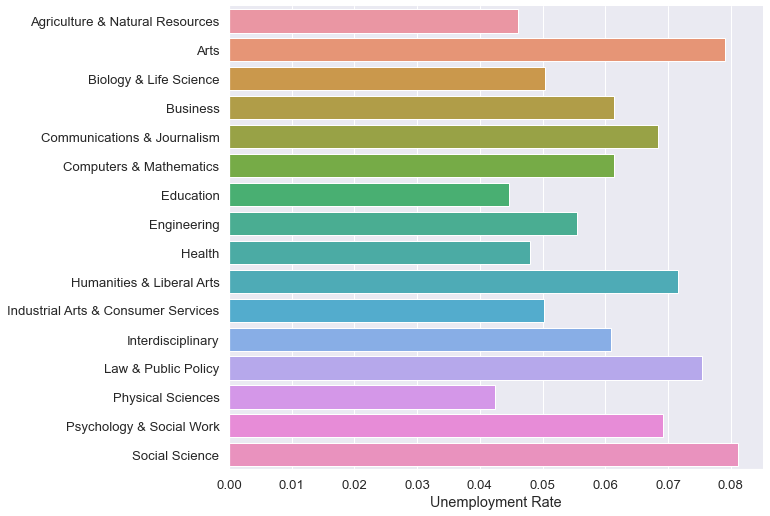

In [114]:
ax = sns.catplot(x="Correct_Unemployment_Rate", y="Major_category", data = cdf, kind="bar")
ax.fig.set_size_inches(30, 8)
ax.set_axis_labels("Unemployment Rate", "")

In terms of Unemployment Rate, Social Sciences and Arts take the leadership (in a bad way), both scoring about 8%. All remaining positions fluctuate a lot, but it can be easily observed that the numbers do not go beyond 4 and 8 percents both ways. As a result, it sums up to the average unemployment rate turns out to be around 6%.

# Results

Combining all of our findings, we can now answer research questions

1. In which spheres students are able to find jobs that are worthy of their education?

The most successful major categories statistically turn out to be Education, Health and Engineering, combined with Computers & Mathematics/Humanities & Liberal Arts. Almost a half of students are being able to land a college level jobs in their field.

Job is still a job, even if it is not something you have been studying for 4 years. Top majors which end up being employed outside of their field are Law & Public Policy, Industrial Arts & Consumer Services, Arts, Communications & Journalism and Agriculture & Natural Resources (though Business is unbeatable in the scope of numbers).

The least successful ones, turned out to be Social Sciences, Arts, Law & Public Policy and Humanities & Liberal Arts. It does seem like humanities graduates struggling to find a job is not a stereotype at all (and Business is still on the top if we look up the numbers, not percents).


2. Which major category is the most program-diverse?

The obvious leader is Engineering with overwhelming 29 programs offered. Then, follows Education (16), Humanities & Liberal Arts (15) and Biology & Life Science (14). Unfortunately, the most various does not equal the most popular, and Mr Business sends their regards.